# Predecting Diabetes Using Decision Trees 

In [182]:
#import pandas library
import pandas as pd

# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier


# Import train_test_split function
from sklearn.model_selection import train_test_split

# import confusion matrix 
from sklearn.metrics import confusion_matrix

#Import scikit-learn metrics module for accuracy calculation , recall , precision 
from sklearn import metrics

#import modules for sklearn.external 
import six
import sys
sys.modules['sklearn.externals.six'] = six

#Import modules for Visualizing Decision trees
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

## Load the data 

In [183]:
data_frame = pd.read_csv("diabetes.csv")

In [184]:
data_frame.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [185]:
data_frame.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [186]:
#feature variables 
feature_variable = data_frame.drop(['Outcome'], axis=1)
feature_variable

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [187]:
#target variable
target_variable

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [188]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Training and evaluating on the training dataset

In [189]:
x_train, x_test, y_train, y_test = train_test_split(feature_variable, 
                                                    target_variable, 
                                                    test_size=0.3, 
                                                    random_state=1)

In [190]:
#Create Decision Tree classifer object
model = DecisionTreeClassifier()

# Train Decision Tree Classifer
model = model.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)


In [191]:
#Evaluation using Accuracy score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 71.42857142857143


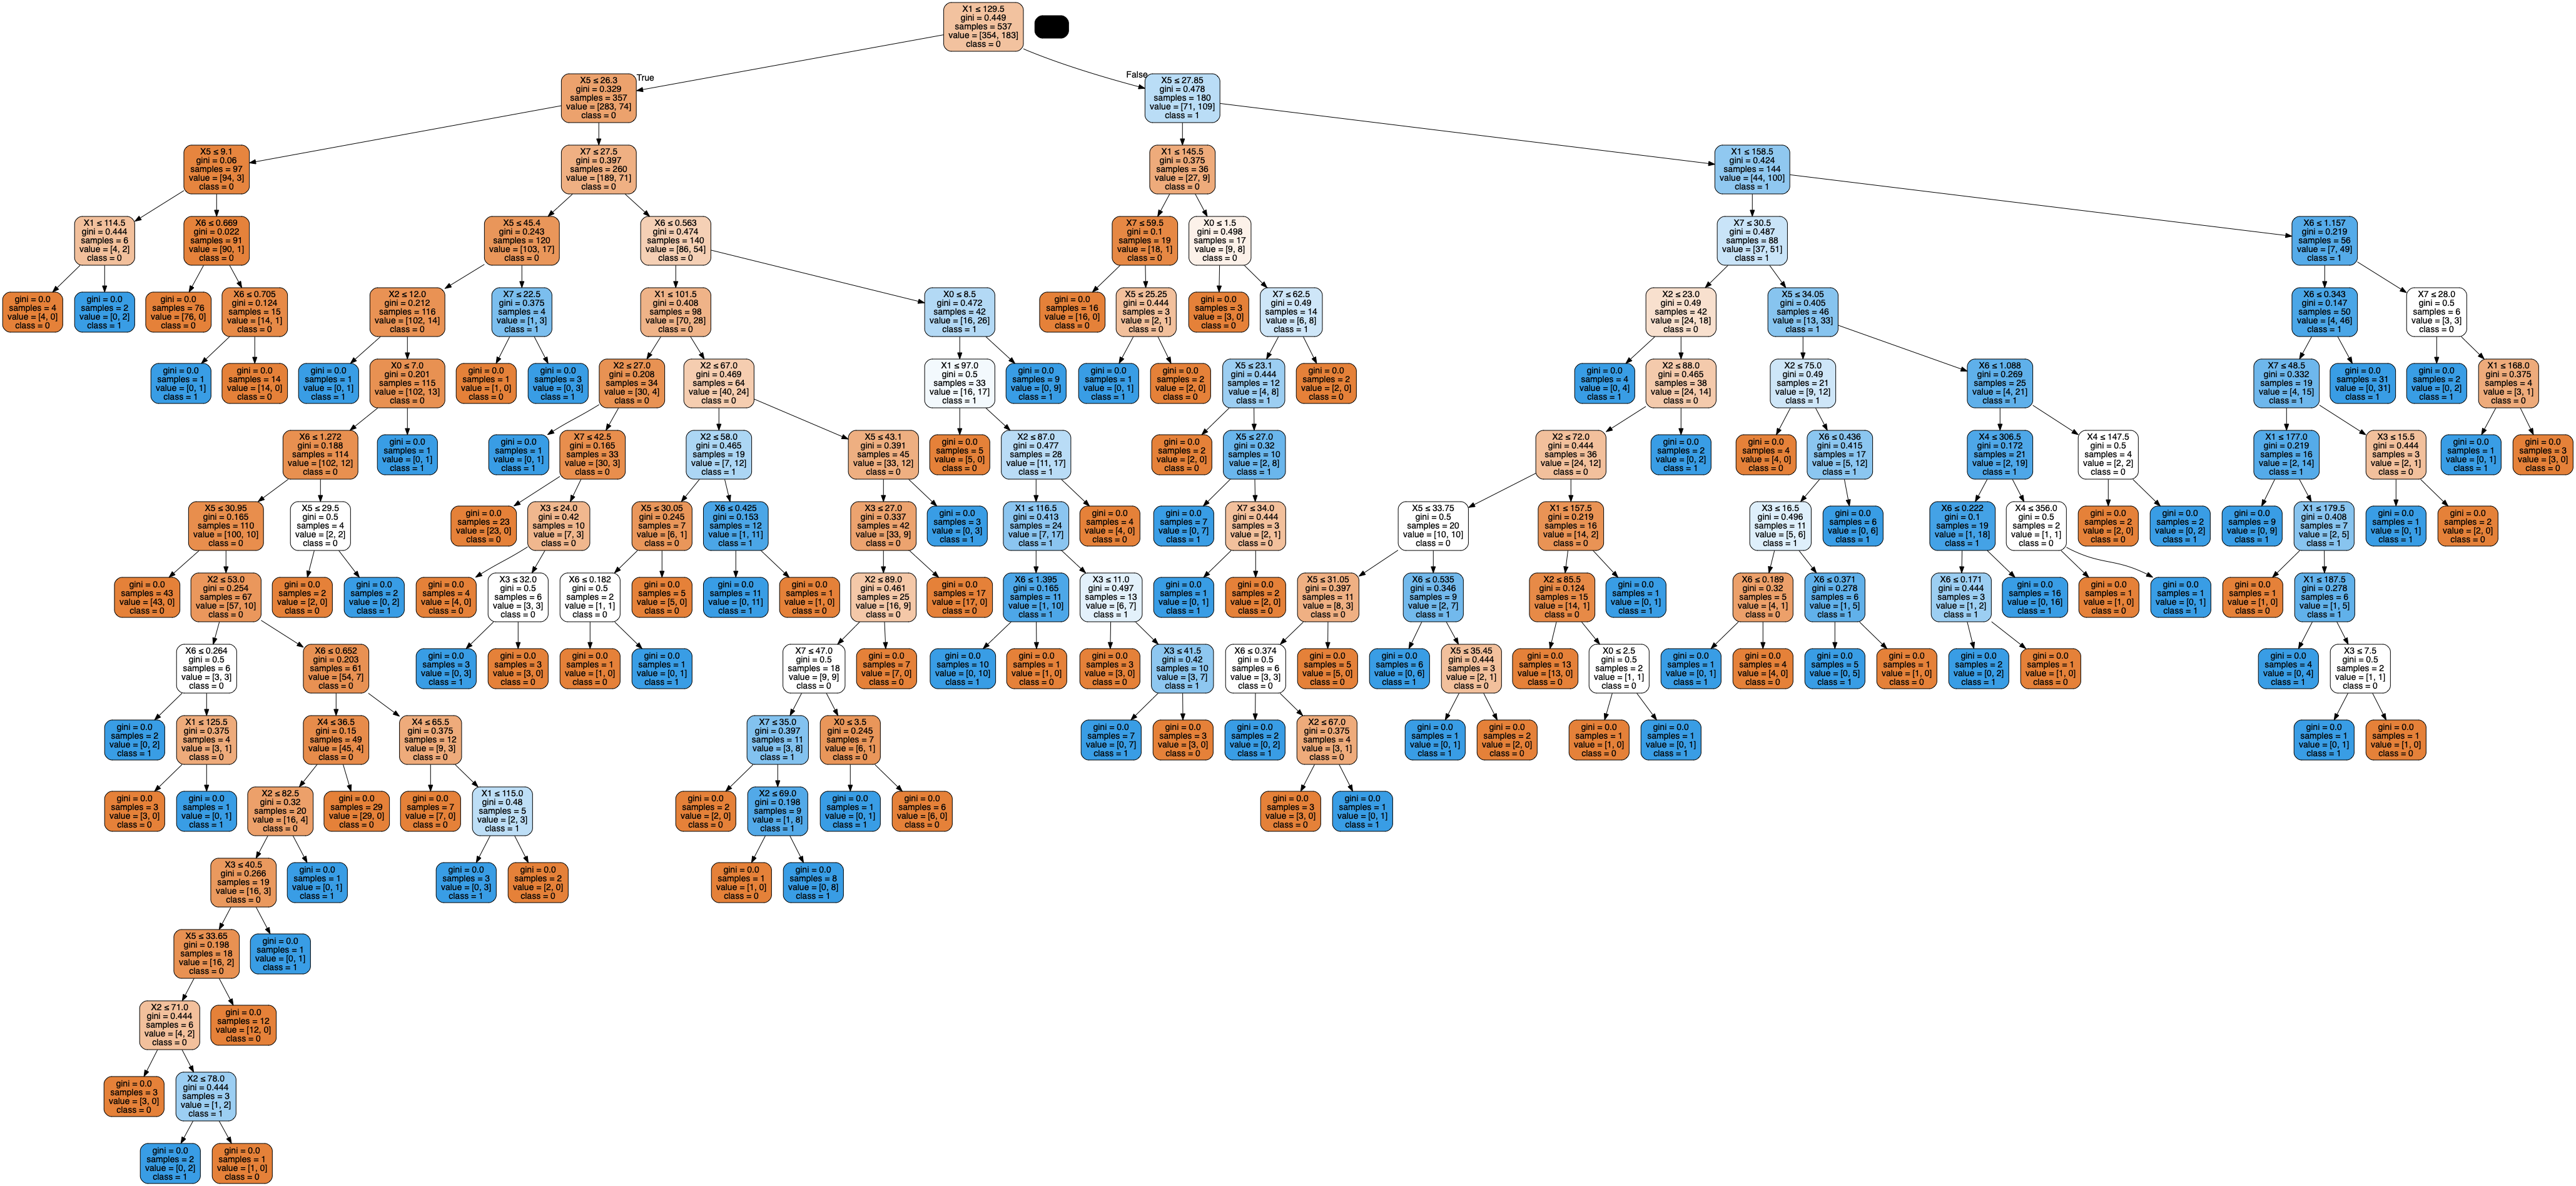

In [192]:
dot_data = StringIO()
export_graphviz(model, 
                out_file = dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names = None, 
                class_names=['0','1']
                )
graph = pydotplus.graph_from_dot_data(
        dot_data.getvalue()
)  
graph.write_png('diabetes.png')
display(Image(graph.create_png()))


In [193]:
# Create Decision Tree classifer object
model = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
model = model.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 77.05627705627705


# Evaluation metrics

## Confusion matrix

In [194]:
confusion_matrix = metrics.confusion_matrix(
    y_test,
    y_pred
)
confusion_matrix 

array([[124,  22],
       [ 31,  54]])

### Precision

In [195]:
precision = metrics.precision_score(
    y_test,
    y_pred, 
    average="macro"
)
print("Evaluation using Precision:",precision)

Evaluation using Precision: 0.7552631578947369


### Recall

In [196]:
recall = metrics.recall_score(y_test, 
                              y_pred,
                              average="macro")
print("Evaluation using Recall:",recall) 

Evaluation using Recall: 0.7423045930701047


In [197]:
F1 = metrics.f1_score(y_test, 
                      y_pred, 
                      average="macro")
print("Evaluation using F1 Score :",F1)

Evaluation using F1 Score : 0.74736385959844


In [198]:
#Evaluation using Classification report
report = metrics.classification_report(
        y_test,
        y_pred
)
print("Evaluation using Classification report:\n",report)

Evaluation using Classification report:
               precision    recall  f1-score   support

           0       0.80      0.85      0.82       146
           1       0.71      0.64      0.67        85

    accuracy                           0.77       231
   macro avg       0.76      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231



In [199]:
#checking prediction value
model.predict([[6,148,72,35,0,33.6,0.627,50]])

/Users/amalalmuarik/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [200]:
feature = feature_variable.columns
feature

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

The classification rate increased to 77.05%, which is better accuracy than the previous model.



In [201]:
report = metrics.classification_report(
        y_test,
        y_pred
)
print("Evaluation using Classification report:\n",report)

Evaluation using Classification report:
               precision    recall  f1-score   support

           0       0.80      0.85      0.82       146
           1       0.71      0.64      0.67        85

    accuracy                           0.77       231
   macro avg       0.76      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231



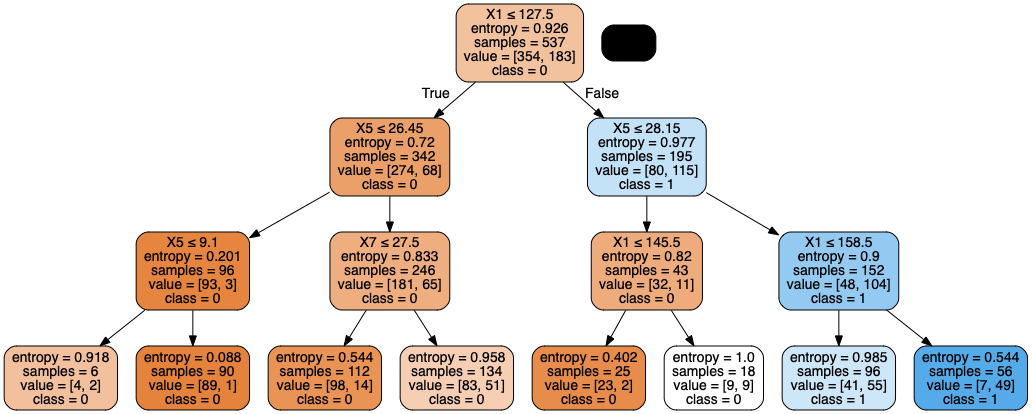

In [202]:
#Decision Tree Visualisation
dot_data = StringIO()
export_graphviz(model, 
                out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, 
                feature_names = None,
                class_names=['0','1']
               )
graph = pydotplus.graph_from_dot_data(
    dot_data.getvalue()
)  
graph.write_png('diabetes.png')
Image(graph.create_png())